# <font color='blue'>Machine Learning</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.3


## A Matemática das Redes Neurais Artificiais

### Construindo a Rede Neural com Programação e Matemática

Teremos 2 Partes:

- Parte 1 - Construção de uma rede neural artificial somente com operações matemáticas 
- Parte 2 - Treinamento da rede para Prever a Ocorrência de Câncer

## A Arquitetura de Redes Neurais Artificiais

Uma rede neural típica é constituída por um conjunto de neurônios interligados, infuenciando uns aos outros formando um sistema maior, capaz de armazenar conhecimento adquirido por meio de exemplos apresentados e, assim, podendo realizar inferências sobre novos conjuntos de dados. Vejamos a arquitetura de redes neurais artificiais.

As redes neurais são comumente apresentadas como um grafo orientado, onde os vértices são os neurônios e as arestas as sinapses. A direção das arestas informa o tipo de alimentação, ou seja, como os neurônios são alimentados (recebem sinais de entrada). As redes neurais derivam seu poder devido a sua estrutura massiva e paralela e a habilidade de aprender por experiência. Essa experiência é transmitida por meio de exemplos obtidos do mundo real, definidos como um conjunto de características formados por dados de entrada e de saída. Se apresentamos esses dados de entrada e saída à rede, estamos diante de aprendizagem supervsionada e caso apresentemos apenas os dados de entrada, estamos diante de aprendizagem não supervisionada!

O conhecimento obtido pela rede através dos exemplos é armazenado na forma de pesos das conexões, os quais serão ajustados a fim de tomar decisões corretas a partir de novas entradas, ou seja, novas situações do mundo real não conhecidas pela rede. O processo de ajuste dos pesos sinapticos é realizado pelo algoritmo de aprendizagem, responsável em armazenar na rede o conhecimento do mundo real obtido atraves de exemplos. Existem vários algoritmos de aprendizagem, dentre eles o backpropagation que é o algoritmo mais utilizado.

![title](imagens/nnet.png)

### Importando os Pacotes

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

In [ ]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [2]:
# Por enquanto precisaremos somente do NumPy
import numpy as np

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark --iversions

numpy 1.18.4



### Parte 1 - Implementando Uma Rede Neural Artificial Somente com Fórmulas Matemáticas (Sem Frameworks)

### Parte 1A - Forward Propagation

![title](imagens/nn.png)

### Desenvolvendo a Função Para Inicialização de Pesos

In [4]:
# Função para inicialização randômica dos parâmetros do modelo
def inicializa_parametros(dims_camada_entrada):
    
    # Dicionário para os parâmetros
    parameters = {}
    
    # Comprimento das dimensões das camadas
    comp = len(dims_camada_entrada)
    
    # Loop pelo comprimento
    for i in range(1, comp):
        
        # Inicialização da matriz de pesos, considerando um limite inferior e superior para encontrar um valor randomico.
        # Utilizando valores de uma distribuição normal (randn)
        parameters["W" + str(i)] = np.random.randn(dims_camada_entrada[i], dims_camada_entrada[i - 1]) * 0.01
        
        # Inicialização do bias
        parameters["b" + str(i)] = np.zeros((dims_camada_entrada[i], 1))
    
    return parameters

### Desenvolvendo a Função Sigmóide

A principal razão pela qual usamos a função sigmóide é porque ela permite converter números para valores entre 0 e 1. 

Portanto, é especialmente usada para modelos em que temos que prever a probabilidade como uma saída. Como a probabilidade de qualquer coisa existir apenas entre o intervalo de 0 e 1, sigmoide é a escolha certa. Algumas caracterísiticas da função sigmóide:

- A função é diferenciável. Isso significa que podemos encontrar a inclinação da curva sigmóide em dois pontos.
- A função sigmóide logística pode fazer com que uma rede neural fique presa no momento do treinamento.
- A função softmax é uma função de ativação logística mais generalizada, utilizada para a classificação em várias classes.

![title](imagens/sigmoid.png)

Se a função parecer muito abstrata ou estranha para você, não se preocupe muito com detalhes como o número de Euler e ou como alguém criou essa função. Para aqueles que não são conhecedores de matemática, a única coisa importante sobre a função sigmóide é primeiro, sua curva e, segundo, sua derivada. Aqui estão mais alguns detalhes:

- **A função sigmóide produz resultados semelhantes aos da função de passo (Step Function) em que a saída está entre 0 e 1. A curva cruza 0,5 a z = 0, e podemos definir regras para a função de ativação, como: Se a saída do neurônio sigmóide for maior que ou igual a 0,5, gera 1; se a saída for menor que 0,5, gera 0.**


- A função sigmóide é suave e possui uma derivada simples de σ(z) * (1 - σ (z)), que é diferenciável em qualquer lugar da curva. 


- Se z for muito negativo, a saída será aproximadamente 0; se z for muito positivo, a saída é aproximadamente 1; mas em torno de z = 0, onde z não é muito grande nem muito pequeno, temos um desvio relativamente maior à medida que z muda.

**Afinal, O Que é Derivada?**

![title](imagens/derivada.png)

No Cálculo, a derivada em um ponto de uma função y = f(x) representa a taxa de variação instantânea de y em relação a x neste ponto. 

Um exemplo típico é a função velocidade que representa a taxa de variação (derivada) da função espaço. Do mesmo modo, a função aceleração é a derivada da função velocidade. Geometricamente, a derivada no ponto x = a de y = f(x) representa a inclinação da reta tangente ao gráfico desta função no ponto (a, f(a)).

A função que a cada ponto x associa a derivada neste ponto de f(x) é chamada de função derivada de f(x).

![title](imagens/derivada.gif)

Em cada ponto, a derivada de f(x) é a tangente do ângulo que a reta tangente à curva faz em relação ao eixo das abscissas. A reta é sempre tangente à curva azul; a tangente do ângulo que ela faz com o eixo das abscissas é a derivada. Note-se que a derivada é positiva quando verde, negativa quando vermelha, e zero quando preta.

A derivada de uma função y = f(x) num ponto x = x0, é igual ao valor da tangente trigonométrica do ângulo formado pela tangente geométrica à curva representativa de y=f(x), no ponto x = x0, ou seja, a derivada é o coeficiente angular da reta tangente ao gráfico da função no ponto x0.

A função derivada é representada por f'(x).

In [5]:
# Função sigmóide
# Entrega valores entre 0 e 1.
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A, Z

### Desenvolvendo a Função ReLU

Para usar a descida de gradiente estocástico com retropropagação de erros para treinar redes neurais profundas, é necessária uma função de ativação que se assemelhe e atue como uma função linear, mas é, de fato, uma função não linear que permite que relacionamentos complexos nos dados sejam aprendidos.

A solução é usar a função de ativação linear retificada ou ReL para abreviar. Um nó ou unidade que implementa essa função de ativação é chamado de unidade de ativação linear retificada ou ReLU, para abreviar. Frequentemente, as redes que usam a função retificadora para as camadas ocultas são chamadas de redes retificadas.

A função ReLU é definida como 𝑓(𝑥) = max (0, 𝑥). Normalmente, ela é aplicada elemento a elemento à saída de alguma outra função, como um produto de vetor e matriz. 

A adoção da ReLU pode ser facilmente considerada um dos marcos na revolução do aprendizado profundo, por ex. as técnicas que agora permitem o desenvolvimento rotineiro de redes neurais muito profundas.

A derivada da função linear retificada também é fácil de calcular. **A derivada da função de ativação é necessária ao atualizar os pesos de um nó como parte da retropropagação de erro.**

A derivada da função é a inclinação. A inclinação para valores negativos é 0,0 e a inclinação para valores positivos é 1,0.

Tradicionalmente, o campo das redes neurais evitou qualquer função de ativação que não fosse completamente diferenciável, talvez adiando a adoção da função linear retificada e de outras funções lineares. Tecnicamente, não podemos calcular a derivada quando a entrada é 0,0; portanto, podemos assumir que é zero. Este não é um problema na prática.

Os gradientes das ativações tangentes e hiperbólicas são menores que a porção positiva da ReLU. Isso significa que a parte positiva é atualizada mais rapidamente à medida que o treinamento avança. No entanto, isso tem um custo. O gradiente 0 no lado esquerdo tem seu próprio problema, chamado "neurônios mortos", no qual uma atualização de gradiente define os valores recebidos para uma ReLU, de modo que a saída é sempre zero; unidades ReLU modificadas, como ELU (ou Leaky ReLU, ou PReLU, etc.) podem melhorar isso.

![title](imagens/relu.png)

A saída da função relu durante o Forward propagation é sempre positivo. Valores negativos serão transformados em 0.

In [6]:
# Função de ativação ReLu (Rectified Linear Unit)
# Parametros de entrada são multiplacados pelos Pesos (pré-definidos) que gera uma saída multiplicada pelo Bias que é o 
# parametro de entrada da função ReLu.
def relu(Z):
    A = abs(Z * (Z > 0))
    return A, Z

![title](imagens/net-relu.png)

### Desenvolvendo a Ativação Linear

In [7]:
# Operação de ativação
# A é a matriz com os dados de entrada
# W é a matriz de pesos
# b é o bias
def linear_activation(A, W, b):
    Z = np.dot(W, A) + b
    cache = (A, W, b)
    return Z, cache

# O resultado da função de ativação é a entrada da função Relu ou Sigmoid

### Construindo o Processo de Forward Propagation

In [8]:
# Movimento para frente (forward)
def forward(A_prev, W, b, activation):
    
    # Se a função de ativação for Sigmoid, entramos neste bloco
    if activation == "sigmoid":
        Z, linear_cache = linear_activation(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        
    # Se não, se for ReLu, entramos neste bloco    
    elif activation == "relu":
        Z, linear_cache = linear_activation(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    cache = (linear_cache, activation_cache)
    
    return A, cache

### Combinando Ativação e Propagação

In [9]:
# Propagação para frente
def forward_propagation(X, parameters):
    
    # Lista de valores anteriores (cache)
    caches = []
    
    # Dados de entrada
    A = X
    
    # Comprimento dos parâmetros
    L = len(parameters) // 2
   
    # Loop
    for i in range(1, L):
      
        # Guarda o valor prévio de A
        A_prev = A
        
        # Executa o forward
        A, cache = forward(A_prev, parameters["W" + str(i)], parameters["b" + str(i)], activation = "relu")
        
        # Grava o cache
        caches.append(cache)
    
    # Saída na última camada
    A_last, cache = forward(A, parameters["W" + str(L)], parameters["b" + str(L)], activation = "sigmoid")
    
    # Grava o cache
    caches.append(cache)
    
    return(A_last, caches)

### Desenvolvendo a Função de Custo

![title](imagens/custo.png)

In [10]:
# Função de custo (ou função de erro)
def calcula_custo(A_last, Y):
    
    # Ajusta o shape de Y para obter seu comprimento (total de elementos)
    m = Y.shape[1]
    
    # Calcula o custo comparando valor real e previso
    custo = (-1 / m) * np.sum((Y * np.log(A_last)) + ((1 - Y) * np.log(1 - A_last)))
    
    # Ajusta o shape do custo
    custo = np.squeeze(custo)
    
    return(custo)

### Parte 1B - Backward Propagation

![title](imagens/backpropagation.png)

### Desenvolvendo o Backward Propagation - Função Sigmóide Backward

In [11]:
# Função sigmoid para o backpropagation 
# Fazemos o cálculo da derivada pois não queremos o valor completo da função, mas sim sua variação
def sigmoid_backward(da, Z):
    
    # Calculamos a derivada de Z
    dg = (1 / (1 + np.exp(-Z))) * (1 - (1 / (1 + np.exp(-Z))))
    
    # Encontramos a mudança na derivada de z
    dz = da * dg
    return dz

# Compare com a função sigmoid do forward propagation
# A = 1 / (1 + np.exp(-Z))

### Desenvolvendo o Backward Propagation - Função ReLu Backward

In [12]:
# Função relu para o backpropagation 
# Fazemos o cálculo da derivada pois não queremos o valor completo da função, mas sim sua variação
def relu_backward(da, Z):
    
    dg = 1 * ( Z >= 0)
    dz = da * dg
    return dz

# Compare com a função relu do forward propagation:
# A = abs(Z * (Z > 0))

### Desenvolvendo o Backward Propagation - Ativação Linear Backward

In [13]:
# Ativação linear para o backpropagation
def linear_backward_function(dz, cache):
    
    # Recebe os valores do cache (memória)
    A_prev, W, b = cache
    
    # Shape de m
    m = A_prev.shape[1]
    
    # Calcula a derivada de W (resultado da operação com dz)
    dW = (1 / m) * np.dot(dz, A_prev.T)
    
    # Calcula a derivada de b (resultado da operação com dz)
    db = (1 / m) * np.sum(dz, axis = 1, keepdims = True)
    
    # Calcula a derivada da operação
    dA_prev = np.dot(W.T, dz)
    
    return dA_prev, dW, db

### Desenvolvendo o Backward Propagation - Ativação Linear Backward

In [14]:
# Função que define o tipo de ativação (relu ou sigmoid)
def linear_activation_backward(dA, cache, activation):
    
    # Extrai o cache
    linear_cache, activation_cache = cache
    
    # Verifica se a ativação é relu
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_function(dZ, linear_cache)
        
    # Verifica se a ativação é sigmoid
    if activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_function(dZ, linear_cache)
        
    return dA_prev, dW, db

### Combinando Ativação e Retropropagação - Algoritmo Backpropagation

In [15]:
# Algoritmo Backpropagation (calcula os gradientes para atualização dos pesos)
# AL = Valor previsto no Forward
# Y = Valor real
def backward_propagation(AL, Y, caches):
    
    # Dicionário para os gradientes
    grads = {}
    
    # Comprimento dos dados (que estão no cache)
    L = len(caches)
    
    # Extrai o comprimento para o valor de m
    m = AL.shape[1]
    
    # Ajusta o shape de Y
    Y = Y.reshape(AL.shape)
    
    # Calcula a derivada da previsão final da rede (feita ao final do Forward Propagation)
    dAL = -((Y / AL) - ((1 - Y) / (1 - AL)))
    
    # Captura o valor corrente do cache
    current_cache = caches[L - 1]
    
    # Gera a lista de gradiente para os dados, os pesos e o bias
    # Fazemos isso uma vez, pois estamos na parte final da rede, iniciando o caminho de volta
    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    # Loop para calcular a derivada durante as ativações lineares com a relu
    for l in reversed(range(L - 1)):
        
        # Cache atual
        current_cache = caches[l]
        
        # Calcula as derivadas
        dA_prev, dW, db = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        
        # Alimenta os gradientes na lista, usando o índice respectivo
        grads["dA" + str(l)] = dA_prev
        grads["dW" + str(l + 1)] = dW
        grads["db" + str(l + 1)] = db
        
    return grads

### Gradientes e Atualização dos Pesos

In [16]:
# Função de atualização de pesos
def atualiza_pesos(parameters, grads, learning_rate):
    
    # Comprimento da estrutura de dados com os parâmetros (pesos e bias)
    L = len(parameters)//2
    
    # Loop para atualização dos pesos
    for l in range(L):
        
        # Atualização dos pesos
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - (learning_rate * grads["dW" + str(l + 1)])
        
        # Atualização do bias
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - (learning_rate * grads["db" + str(l + 1)])
    
    return parameters

### Implementando a Rede Completa

In [17]:
# Modelo completo da rede neural
def modeloNN(X, Y, dims_camada_entrada, learning_rate = 0.0075, num_iterations = 100):
    
    # Lista para receber o custo a cada época de treinamento
    custos = []
    
    # Inicializa os parâmetros
    parametros = inicializa_parametros(dims_camada_entrada)
    
    # Loop pelo número de iterações (épocas)
    for i in range(num_iterations):
        
        # Forward Propagation
        AL, caches = forward_propagation(X, parametros)
        
        # Calcula o custo
        custo = calcula_custo(AL, Y)
        
        # Backward Propagation
        # Nota: ao invés de AL e Y, poderíamos passar somente o valor do custo
        # Estamos passando o valor de AL e Y para fique claro didaticamente o que está sendo feito
        gradientes = backward_propagation(AL, Y, caches)
        
        # Atualiza os pesos
        parametros = atualiza_pesos(parametros, gradientes, learning_rate)
        
        # Print do valor intermediário do custo
        # A redução do custo indica o aprendizado do modelo
        if i % 10 == 0:
            print("Custo Após " + str(i) + " iterações é " + str(custo))
            custos.append(custo)
            
    return parametros, custos 

In [18]:
# Função para fazer as previsões
# Não precisamos do Backpropagation pois ao fazer previsões como o modelo treinado, 
# teremos os melhores valores de pesos (parametros)
def predict(X, parametros):
    AL, caches = forward_propagation(X, parametros)
    return AL

### Parte 2 - Treinamento da rede para Prever a Ocorrência de Câncer

In [19]:
# Imports
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Carregando os Dados

https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset

In [20]:
# Carregamos o objeto completo
temp = load_breast_cancer()

In [21]:
# Tipo do objeto
type(temp)

sklearn.utils.Bunch

In [22]:
# Visualiza o objeto
temp

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [23]:
# Carregamos o dataset
dados = pd.DataFrame(columns = load_breast_cancer()["feature_names"], data = load_breast_cancer()["data"])

In [24]:
# Shape
dados.shape

(569, 30)

In [25]:
# Visualiza os dados
dados.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
# Verifica se temos valores ausentes
dados.isnull().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

In [27]:
# Separa a variável target
target = load_breast_cancer()["target"]

In [28]:
type(target)

numpy.ndarray

In [29]:
# Visualiza a variável
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [30]:
# Total de registros por classe - Câncer Benigno
np.count_nonzero(target == 1)

357

In [31]:
# Total de registros por classe - Câncer Maligno
np.count_nonzero(target == 0)

212

In [32]:
# Vamos extrair os labels

# Dicionário para os labels
labels = {}

# Nomes das classes da variável target
target_names = load_breast_cancer()["target_names"]

# Mapeamento
for i in range(len(target_names)):
    labels.update({i:target_names[i]})

In [33]:
# Visualiza os labels
labels

{0: 'malignant', 1: 'benign'}

In [34]:
# Agora preparamos as variáveis preditoras em X
X = np.array(dados)

In [35]:
# Visualiza os dados de entrada
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [36]:
# Dividimos os dados de entrada e saída em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, target, test_size = 0.15, shuffle = True)

In [37]:
# Shape dos dados de treino
print(X_treino.shape)
print(y_treino.shape)

(483, 30)
(483,)


In [38]:
# Shape dos dados de teste
print(X_teste.shape)
print(y_teste.shape)

(86, 30)
(86,)


In [39]:
# Ajusta o shape dos dados de entrada
X_treino = X_treino.T
X_teste = X_teste.T

In [40]:
print(X_treino.shape)
print(X_teste.shape)

(30, 483)
(30, 86)


In [42]:
X_treino

array([[1.348e+01, 1.441e+01, 1.008e+01, ..., 9.667e+00, 1.546e+01,
        9.668e+00],
       [2.082e+01, 1.973e+01, 1.511e+01, ..., 1.849e+01, 2.395e+01,
        1.810e+01],
       [8.840e+01, 9.603e+01, 6.376e+01, ..., 6.149e+01, 1.038e+02,
        6.106e+01],
       ...,
       [2.258e-01, 1.021e-01, 1.042e-02, ..., 6.560e-02, 2.163e-01,
        2.500e-02],
       [2.807e-01, 2.272e-01, 2.933e-01, ..., 3.174e-01, 3.013e-01,
        3.057e-01],
       [1.071e-01, 8.799e-02, 7.697e-02, ..., 8.524e-02, 1.067e-01,
        7.875e-02]])

In [43]:
# Precisamos ajustar também os dados de saída
y_treino = y_treino.reshape(1, len(y_treino))
y_teste = y_teste.reshape(1, len(y_teste))

In [44]:
print(y_treino.shape)
print(y_teste.shape)

(1, 483)
(1, 86)


In [45]:
# Variável com as dimensões de entrada para oo número de neurônios 
dims_camada_entrada = [X_treino.shape[0], 50, 20, 5, 1]

In [46]:
dims_camada_entrada

[30, 50, 20, 5, 1]

In [47]:
# Treinamento do modelo

print("\nIniciando o Treinamento.\n")

parametros, custo = modeloNN(X = X_treino, 
                             Y = y_treino, 
                             dims_camada_entrada = dims_camada_entrada, 
                             num_iterations = 3000, 
                             learning_rate = 0.0075)

print("\nTreinamento Concluído.\n")


Iniciando o Treinamento.

Custo Após 0 iterações é 0.6931712641090011
Custo Após 10 iterações é 0.6920903232093767
Custo Após 20 iterações é 0.6910491306047608
Custo Após 30 iterações é 0.690046209074601
Custo Após 40 iterações é 0.6890801385770761
Custo Após 50 iterações é 0.6881495579667648
Custo Após 60 iterações é 0.6872531618084966
Custo Após 70 iterações é 0.686389680091441
Custo Após 80 iterações é 0.6855578974773596
Custo Após 90 iterações é 0.6847566342073587
Custo Após 100 iterações é 0.6839847618955676
Custo Após 110 iterações é 0.6832411972583057
Custo Após 120 iterações é 0.6825248837878065
Custo Após 130 iterações é 0.681834813278932
Custo Após 140 iterações é 0.6811700197553325
Custo Após 150 iterações é 0.6805295603411221
Custo Após 160 iterações é 0.6799124905341978
Custo Após 170 iterações é 0.6793179058462602
Custo Após 180 iterações é 0.6787451174940926
Custo Após 190 iterações é 0.6781933211774536
Custo Após 200 iterações é 0.6776616743922584
Custo Após 210 iteraç

Custo Após 1770 iterações é 0.3084395375561643
Custo Após 1780 iterações é 0.30394176488641983
Custo Após 1790 iterações é 0.30519794700589115
Custo Após 1800 iterações é 0.30615184184127897
Custo Após 1810 iterações é 0.30334284622636803
Custo Após 1820 iterações é 0.2984511267185822
Custo Após 1830 iterações é 0.28594941143446384
Custo Após 1840 iterações é 0.2849766005457722
Custo Após 1850 iterações é 0.28788913250323944
Custo Após 1860 iterações é 0.2872314423002154
Custo Após 1870 iterações é 0.2851955562507452
Custo Após 1880 iterações é 0.2852057241561979
Custo Após 1890 iterações é 0.28407455905425677
Custo Após 1900 iterações é 0.2839687004174193
Custo Após 1910 iterações é 0.28306587181117926
Custo Após 1920 iterações é 0.2829978532207098
Custo Após 1930 iterações é 0.2834617426800114
Custo Após 1940 iterações é 0.28570791972128234
Custo Após 1950 iterações é 0.2991738949139782
Custo Após 1960 iterações é 0.30280074785489275
Custo Após 1970 iterações é 0.28813509048229113
Cu

In [66]:
parametros

{'W1': array([[ 6.27284258e-03,  1.25209617e-02, -1.04666519e-03, ...,
         -1.64245522e-04,  5.23057675e-04, -1.49381194e-03],
        [-1.26021721e-02,  1.20199952e-02,  7.69668452e-04, ...,
          1.18041608e-02,  1.91312196e-02, -1.08280748e-02],
        [ 4.07770508e-03,  1.24854019e-02, -3.69292297e-02, ...,
         -5.16906700e-05, -1.19283399e-03, -2.07711566e-03],
        ...,
        [-1.83443236e-02, -1.13429295e-03,  1.02489906e-02, ...,
          8.97367808e-03,  3.45379641e-03, -3.68197683e-03],
        [-5.01355033e-03,  5.35610250e-03, -3.70312890e-02, ...,
          7.31375420e-04,  2.15770275e-03,  7.90430145e-03],
        [ 3.20146034e-05,  1.16106531e-02, -2.40204719e-02, ...,
         -2.72206937e-03,  1.78494544e-02, -9.60297262e-05]]),
 'b1': array([[ 0.00000000e+00],
        [ 0.00000000e+00],
        [-8.98065483e-04],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [-1.70929187e-03],
        [-5.18050572e-04],
 

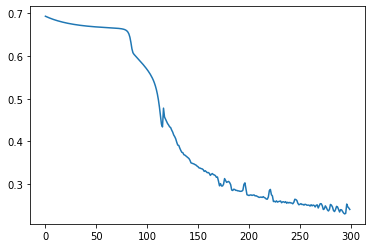

In [48]:
# Plot do erro durante o treinamento
plt.plot(custo)

In [49]:
# Previsões com os dados de treino
y_pred_treino = predict(X_treino, parametros)

In [50]:
# Visualiza as previsões
y_pred_treino

array([[8.11114247e-01, 7.95577052e-01, 8.74509822e-01, 8.72543044e-01,
        6.98834598e-05, 2.57354991e-23, 8.75699004e-01, 8.75758183e-01,
        8.75019240e-01, 8.75395050e-01, 9.49189885e-11, 8.75916853e-01,
        8.74873338e-01, 8.71800146e-01, 1.84422593e-02, 6.07607831e-09,
        8.75110547e-01, 8.74999342e-01, 8.75590632e-01, 8.75055489e-01,
        8.74937998e-01, 1.09056058e-09, 9.61929159e-06, 8.74333306e-01,
        8.74468460e-01, 8.74772144e-01, 8.74889302e-01, 1.01557817e-01,
        1.90965120e-07, 8.76410759e-01, 8.75238862e-01, 2.45790919e-01,
        2.47281003e-01, 8.73760156e-01, 8.36257815e-01, 8.71764236e-01,
        8.26651891e-01, 8.74385162e-01, 8.74789235e-01, 8.74822585e-01,
        8.75324402e-01, 8.75098921e-01, 8.74603458e-01, 8.75348739e-01,
        8.76079912e-01, 8.33483913e-01, 8.18562448e-01, 6.47007135e-01,
        8.75769931e-01, 8.75130261e-01, 8.11266875e-01, 5.06853647e-05,
        8.74714538e-01, 8.74721919e-01, 5.33117441e-01, 3.468561

In [51]:
# Ajustamos o shape em treino
y_pred_treino = y_pred_treino.reshape(-1)
y_treino = y_treino.reshape(-1)

In [52]:
y_pred_treino > 0.5

array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False,  True, False, False,  True,  True, False, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,

In [53]:
# Convertemos as previsões para o valor binário de classe 
# (0 ou 1, usando como threshold o valor de 0.5 da probabilidade)
y_pred_treino = 1 * (y_pred_treino > 0.5)

In [54]:
y_pred_treino

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [55]:
# Calculamos a acurácia comparando valor real com valor previsto
acc_treino = sum(1 * (y_pred_treino == y_treino)) / len(y_pred_treino) * 100

In [56]:
print("Acurácia nos dados de treino: " + str(acc_treino))

Acurácia nos dados de treino: 91.7184265010352


In [57]:
print(classification_report(y_treino, y_pred_treino, target_names = ['Maligno', 'Benigno']))

              precision    recall  f1-score   support

     Maligno       0.97      0.81      0.88       183
     Benigno       0.89      0.98      0.94       300

    accuracy                           0.92       483
   macro avg       0.93      0.90      0.91       483
weighted avg       0.92      0.92      0.92       483



In [58]:
# Previsões com o modelo usando dados de teste
y_pred_teste = predict(X_teste, parametros)

In [59]:
# Visualiza os dados
y_pred_teste

array([[1.41458631e-12, 8.74785352e-01, 8.75194566e-01, 1.02267540e-04,
        8.74069468e-01, 8.75291500e-01, 4.66503040e-01, 8.74916323e-01,
        3.96301315e-02, 8.54740406e-01, 8.74515163e-01, 8.74702986e-01,
        8.74225745e-01, 4.52252428e-01, 8.75422612e-01, 8.56263532e-01,
        9.78486589e-04, 2.75944405e-03, 8.75721530e-01, 8.74576194e-01,
        2.33861400e-10, 8.75033207e-01, 8.53453784e-01, 8.74096900e-01,
        8.75484362e-01, 2.15879494e-04, 8.74448891e-01, 8.71204580e-01,
        8.75093548e-01, 4.72972264e-01, 7.20340170e-01, 8.17035015e-01,
        8.88544751e-07, 8.27584464e-01, 5.58568157e-08, 8.74814491e-01,
        8.75047191e-01, 8.75368287e-01, 1.38277010e-03, 8.75762476e-01,
        1.08100182e-02, 1.98932728e-01, 7.62453789e-04, 2.50519262e-03,
        8.05513916e-02, 8.67105889e-01, 8.74310869e-01, 8.75200859e-01,
        8.75056995e-01, 8.74593459e-01, 8.75512488e-01, 8.75542119e-01,
        8.25574992e-01, 8.76596921e-01, 8.51929415e-01, 8.758500

In [60]:
# Ajustamos os shapes
y_pred_teste = y_pred_teste.reshape(-1)
y_teste = y_teste.reshape(-1)

In [61]:
# Convertemos as previsões para o valor binário de classe
y_pred_teste = 1 * (y_pred_teste > 0.5)

In [62]:
# Visualizamos as previsões
y_pred_teste

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1])

In [63]:
# Calculamos a acurácia
acuracia = sum(1 * (y_pred_teste == y_teste)) / len(y_pred_teste) * 100

In [64]:
print("Acurácia nos dados de teste: " + str(acuracia))

Acurácia nos dados de teste: 95.34883720930233


In [65]:
print(classification_report(y_teste, y_pred_teste, target_names = ['Maligno', 'Benigno']))

              precision    recall  f1-score   support

     Maligno       1.00      0.86      0.93        29
     Benigno       0.93      1.00      0.97        57

    accuracy                           0.95        86
   macro avg       0.97      0.93      0.95        86
weighted avg       0.96      0.95      0.95        86



### Análise

Nosso modelo foi capaz de obter uma acurácia melhor com os dados desconhecidos (Teste) do que comparado aos dados utilizados durante o treinamento.

A quantidade de dado é muito pouco. Esse estudo foi para fixação e aprendizado de como criar uma rede neural sem a utilização de Frameworks.

Podiamos ter aplicado um Early Stop durante o treinamento na função de custo, para que quando o modelo deixa de aprender por X execuções interrompa o treinamento. Isso poupa processamento, tempo e evita um possível overfitting.